### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Import Dataset

In [2]:
#importing the All_frog data
frog_data = pd.read_csv('all_frog_data.csv')
frog_data.head(5)

,Unnamed: 0,gbifID,eventDate,country,continent,stateProvince,decimalLatitude,decimalLongitude,species
0,0,2574007008,23-01-20 1:38,Australia,Australia,New South Wales,-32.719457,152.159267,Litoria Fallax
1,1,3457021422,14-03-10 22:23,Costa Rica,Central America,Puntarenas,8.496999,-83.318613,Agalychnis Callidryas
2,2,1571195309,11-04-14 19:51,Costa Rica,Central America,Heredia,10.450801,-84.068659,Agalychnis Callidryas
3,3,2265778539,21-07-18 21:24,Costa Rica,Central America,Puntarenas,9.756705,-84.613363,Agalychnis Callidryas
4,4,3407962690,29-10-21 13:57,Australia,Australia,Queensland,-26.714302,152.815096,Litoria Fallax


In [3]:
#dropping columns that may be duplicated after merging the two datasets
frog_data1 = frog_data.drop(['Unnamed: 0','country','continent','species','decimalLatitude','decimalLongitude'], axis=1)
frog_data1

,gbifID,eventDate,stateProvince
0,2574007008,23-01-20 1:38,New South Wales
1,3457021422,14-03-10 22:23,Puntarenas
2,1571195309,11-04-14 19:51,Heredia
3,2265778539,21-07-18 21:24,Puntarenas
4,3407962690,29-10-21 13:57,Queensland
...,...,...,...
193786,1322002619,NaN,Panamá
193787,1319899134,01-04-37 0:00,Panamá
193788,1318901755,05-04-37 0:00,Panamá
193789,1322299951,09-07-02 0:00,Gracias a Dios


In [4]:
#importing the All_MLOut data
mlout_data = pd.read_csv('All_MLOut_new.csv')
mlout_data.head(5)

,Unnamed: 0,gbifID,country,continent,decimalLatitude,decimalLongitude,species,occurrenceStatus,key,ppt_mean,soil_mean,tmax_mean,tmin_mean
0,0,2574007008,Australia,Australia,-32.719457,152.159267,Litoria Fallax,1,0,96.00000,118.71667,23.830004,13.908336
1,1,3457021422,Costa Rica,Central America,8.496999,-83.318613,Agalychnis Callidryas,0,1,231.51666,131.88333,31.841667,21.111668
2,2,1571195309,Costa Rica,Central America,10.450801,-84.068659,Agalychnis Callidryas,0,2,279.20000,51.70000,31.341671,22.455004
3,3,2265778539,Costa Rica,Central America,9.756705,-84.613363,Agalychnis Callidryas,0,3,192.10000,171.81667,31.043331,20.061670
4,4,3407962690,Australia,Australia,-26.714302,152.815096,Litoria Fallax,1,4,84.80000,111.61667,25.933338,13.801668


In [5]:
#dropping the columns that may be duplicated after merging the two datasets
frog_data1 = frog_data.drop(['Unnamed: 0','country','continent','species','decimalLatitude','decimalLongitude'], axis=1)
frog_data1

,gbifID,eventDate,stateProvince
0,2574007008,23-01-20 1:38,New South Wales
1,3457021422,14-03-10 22:23,Puntarenas
2,1571195309,11-04-14 19:51,Heredia
3,2265778539,21-07-18 21:24,Puntarenas
4,3407962690,29-10-21 13:57,Queensland
...,...,...,...
193786,1322002619,NaN,Panamá
193787,1319899134,01-04-37 0:00,Panamá
193788,1318901755,05-04-37 0:00,Panamá
193789,1322299951,09-07-02 0:00,Gracias a Dios


### Merging the datasets

In [6]:
merged_data = frog_data1.merge(mlout_data, on='gbifID')
merged_data

,gbifID,eventDate,stateProvince,Unnamed: 0,country,continent,decimalLatitude,decimalLongitude,species,occurrenceStatus,key,ppt_mean,soil_mean,tmax_mean,tmin_mean
0,2574007008,23-01-20 1:38,New South Wales,0,Australia,Australia,-32.719457,152.159267,Litoria Fallax,1,0,96.00000,118.71667,23.830004,13.908336
1,3457021422,14-03-10 22:23,Puntarenas,1,Costa Rica,Central America,8.496999,-83.318613,Agalychnis Callidryas,0,1,231.51666,131.88333,31.841667,21.111668
2,1571195309,11-04-14 19:51,Heredia,2,Costa Rica,Central America,10.450801,-84.068659,Agalychnis Callidryas,0,2,279.20000,51.70000,31.341671,22.455004
3,2265778539,21-07-18 21:24,Puntarenas,3,Costa Rica,Central America,9.756705,-84.613363,Agalychnis Callidryas,0,3,192.10000,171.81667,31.043331,20.061670
4,3407962690,29-10-21 13:57,Queensland,4,Australia,Australia,-26.714302,152.815096,Litoria Fallax,1,4,84.80000,111.61667,25.933338,13.801668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193786,1322002619,NaN,Panamá,193786,Panama,Central America,8.806900,-79.515300,Dendrobates Auratus,0,193786,158.16667,214.81667,31.203335,24.071667
193787,1319899134,01-04-37 0:00,Panamá,193787,Panama,Central America,8.806900,-79.515300,Dendrobates Auratus,0,193787,158.16667,214.81667,31.203335,24.071667
193788,1318901755,05-04-37 0:00,Panamá,193788,Panama,Central America,8.791700,-79.561100,Dendrobates Auratus,0,193788,158.16667,214.81667,31.203335,24.071667
193789,1322299951,09-07-02 0:00,Gracias a Dios,193789,Honduras,Central America,15.091100,-83.557800,Agalychnis Callidryas,0,193789,190.06667,141.43333,29.326668,23.588335


### Basic Manipulations

In [7]:
#getting the data info
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193791 entries, 0 to 193790
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   gbifID            193791 non-null  int64  
 1   eventDate         185026 non-null  object 
 2   stateProvince     193099 non-null  object 
 3   Unnamed: 0        193791 non-null  int64  
 4   country           193791 non-null  object 
 5   continent         193791 non-null  object 
 6   decimalLatitude   193791 non-null  float64
 7   decimalLongitude  193791 non-null  float64
 8   species           193791 non-null  object 
 9   occurrenceStatus  193791 non-null  int64  
 10  key               193791 non-null  int64  
 11  ppt_mean          161812 non-null  float64
 12  soil_mean         161812 non-null  float64
 13  tmax_mean         161812 non-null  float64
 14  tmin_mean         161812 non-null  float64
dtypes: float64(6), int64(4), object(5)
memory usage: 23.7+ MB


 The data info shows that 6 columns have null values and the code below supports the argument

In [8]:
#checking for null values
merged_data.isnull().sum()

gbifID                  0
eventDate            8765
stateProvince         692
Unnamed: 0              0
country                 0
continent               0
decimalLatitude         0
decimalLongitude        0
species                 0
occurrenceStatus        0
key                     0
ppt_mean            31979
soil_mean           31979
tmax_mean           31979
tmin_mean           31979
dtype: int64

### Data Cleaning

**finding the mean and median of the columns having NaN**

In [9]:
ppt_median_value = merged_data['ppt_mean'].median()
ppt_median_value

64.6

In [10]:
soil_median_value = merged_data['soil_mean'].median()
soil_median_value

47.416668

In [11]:
tmax_mean_value = merged_data['tmax_mean'].mean()
tmax_mean_value

22.6985044119672

In [12]:
tmin_mean_value = merged_data['tmin_mean'].mean()
tmin_mean_value

11.160806184930875

**Replacing NaN of the columns with the mean or median based on their type of distribution**

In [13]:
#replacing NaN in the ppt_mean with the median of the values in the same column
merged_data['ppt_mean'].fillna(value=ppt_median_value, inplace=True)
merged_data

,gbifID,eventDate,stateProvince,Unnamed: 0,country,continent,decimalLatitude,decimalLongitude,species,occurrenceStatus,key,ppt_mean,soil_mean,tmax_mean,tmin_mean
0,2574007008,23-01-20 1:38,New South Wales,0,Australia,Australia,-32.719457,152.159267,Litoria Fallax,1,0,96.00000,118.71667,23.830004,13.908336
1,3457021422,14-03-10 22:23,Puntarenas,1,Costa Rica,Central America,8.496999,-83.318613,Agalychnis Callidryas,0,1,231.51666,131.88333,31.841667,21.111668
2,1571195309,11-04-14 19:51,Heredia,2,Costa Rica,Central America,10.450801,-84.068659,Agalychnis Callidryas,0,2,279.20000,51.70000,31.341671,22.455004
3,2265778539,21-07-18 21:24,Puntarenas,3,Costa Rica,Central America,9.756705,-84.613363,Agalychnis Callidryas,0,3,192.10000,171.81667,31.043331,20.061670
4,3407962690,29-10-21 13:57,Queensland,4,Australia,Australia,-26.714302,152.815096,Litoria Fallax,1,4,84.80000,111.61667,25.933338,13.801668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193786,1322002619,NaN,Panamá,193786,Panama,Central America,8.806900,-79.515300,Dendrobates Auratus,0,193786,158.16667,214.81667,31.203335,24.071667
193787,1319899134,01-04-37 0:00,Panamá,193787,Panama,Central America,8.806900,-79.515300,Dendrobates Auratus,0,193787,158.16667,214.81667,31.203335,24.071667
193788,1318901755,05-04-37 0:00,Panamá,193788,Panama,Central America,8.791700,-79.561100,Dendrobates Auratus,0,193788,158.16667,214.81667,31.203335,24.071667
193789,1322299951,09-07-02 0:00,Gracias a Dios,193789,Honduras,Central America,15.091100,-83.557800,Agalychnis Callidryas,0,193789,190.06667,141.43333,29.326668,23.588335


In [14]:
#replacing NaN in the soil_mean with the median of the values in the same column
merged_data['soil_mean'].fillna(value=soil_median_value, inplace=True)
merged_data

,gbifID,eventDate,stateProvince,Unnamed: 0,country,continent,decimalLatitude,decimalLongitude,species,occurrenceStatus,key,ppt_mean,soil_mean,tmax_mean,tmin_mean
0,2574007008,23-01-20 1:38,New South Wales,0,Australia,Australia,-32.719457,152.159267,Litoria Fallax,1,0,96.00000,118.71667,23.830004,13.908336
1,3457021422,14-03-10 22:23,Puntarenas,1,Costa Rica,Central America,8.496999,-83.318613,Agalychnis Callidryas,0,1,231.51666,131.88333,31.841667,21.111668
2,1571195309,11-04-14 19:51,Heredia,2,Costa Rica,Central America,10.450801,-84.068659,Agalychnis Callidryas,0,2,279.20000,51.70000,31.341671,22.455004
3,2265778539,21-07-18 21:24,Puntarenas,3,Costa Rica,Central America,9.756705,-84.613363,Agalychnis Callidryas,0,3,192.10000,171.81667,31.043331,20.061670
4,3407962690,29-10-21 13:57,Queensland,4,Australia,Australia,-26.714302,152.815096,Litoria Fallax,1,4,84.80000,111.61667,25.933338,13.801668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193786,1322002619,NaN,Panamá,193786,Panama,Central America,8.806900,-79.515300,Dendrobates Auratus,0,193786,158.16667,214.81667,31.203335,24.071667
193787,1319899134,01-04-37 0:00,Panamá,193787,Panama,Central America,8.806900,-79.515300,Dendrobates Auratus,0,193787,158.16667,214.81667,31.203335,24.071667
193788,1318901755,05-04-37 0:00,Panamá,193788,Panama,Central America,8.791700,-79.561100,Dendrobates Auratus,0,193788,158.16667,214.81667,31.203335,24.071667
193789,1322299951,09-07-02 0:00,Gracias a Dios,193789,Honduras,Central America,15.091100,-83.557800,Agalychnis Callidryas,0,193789,190.06667,141.43333,29.326668,23.588335


In [15]:
#replacing NaN in the tmax_mean with the mean of the values in the same column
merged_data['tmax_mean'].fillna(value=tmax_mean_value, inplace=True)
merged_data

,gbifID,eventDate,stateProvince,Unnamed: 0,country,continent,decimalLatitude,decimalLongitude,species,occurrenceStatus,key,ppt_mean,soil_mean,tmax_mean,tmin_mean
0,2574007008,23-01-20 1:38,New South Wales,0,Australia,Australia,-32.719457,152.159267,Litoria Fallax,1,0,96.00000,118.71667,23.830004,13.908336
1,3457021422,14-03-10 22:23,Puntarenas,1,Costa Rica,Central America,8.496999,-83.318613,Agalychnis Callidryas,0,1,231.51666,131.88333,31.841667,21.111668
2,1571195309,11-04-14 19:51,Heredia,2,Costa Rica,Central America,10.450801,-84.068659,Agalychnis Callidryas,0,2,279.20000,51.70000,31.341671,22.455004
3,2265778539,21-07-18 21:24,Puntarenas,3,Costa Rica,Central America,9.756705,-84.613363,Agalychnis Callidryas,0,3,192.10000,171.81667,31.043331,20.061670
4,3407962690,29-10-21 13:57,Queensland,4,Australia,Australia,-26.714302,152.815096,Litoria Fallax,1,4,84.80000,111.61667,25.933338,13.801668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193786,1322002619,NaN,Panamá,193786,Panama,Central America,8.806900,-79.515300,Dendrobates Auratus,0,193786,158.16667,214.81667,31.203335,24.071667
193787,1319899134,01-04-37 0:00,Panamá,193787,Panama,Central America,8.806900,-79.515300,Dendrobates Auratus,0,193787,158.16667,214.81667,31.203335,24.071667
193788,1318901755,05-04-37 0:00,Panamá,193788,Panama,Central America,8.791700,-79.561100,Dendrobates Auratus,0,193788,158.16667,214.81667,31.203335,24.071667
193789,1322299951,09-07-02 0:00,Gracias a Dios,193789,Honduras,Central America,15.091100,-83.557800,Agalychnis Callidryas,0,193789,190.06667,141.43333,29.326668,23.588335


In [16]:
#replacing NaN in the tmin_mean with the mean of the values in the same column
merged_data['tmin_mean'].fillna(value=tmin_mean_value, inplace=True)
merged_data

,gbifID,eventDate,stateProvince,Unnamed: 0,country,continent,decimalLatitude,decimalLongitude,species,occurrenceStatus,key,ppt_mean,soil_mean,tmax_mean,tmin_mean
0,2574007008,23-01-20 1:38,New South Wales,0,Australia,Australia,-32.719457,152.159267,Litoria Fallax,1,0,96.00000,118.71667,23.830004,13.908336
1,3457021422,14-03-10 22:23,Puntarenas,1,Costa Rica,Central America,8.496999,-83.318613,Agalychnis Callidryas,0,1,231.51666,131.88333,31.841667,21.111668
2,1571195309,11-04-14 19:51,Heredia,2,Costa Rica,Central America,10.450801,-84.068659,Agalychnis Callidryas,0,2,279.20000,51.70000,31.341671,22.455004
3,2265778539,21-07-18 21:24,Puntarenas,3,Costa Rica,Central America,9.756705,-84.613363,Agalychnis Callidryas,0,3,192.10000,171.81667,31.043331,20.061670
4,3407962690,29-10-21 13:57,Queensland,4,Australia,Australia,-26.714302,152.815096,Litoria Fallax,1,4,84.80000,111.61667,25.933338,13.801668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193786,1322002619,NaN,Panamá,193786,Panama,Central America,8.806900,-79.515300,Dendrobates Auratus,0,193786,158.16667,214.81667,31.203335,24.071667
193787,1319899134,01-04-37 0:00,Panamá,193787,Panama,Central America,8.806900,-79.515300,Dendrobates Auratus,0,193787,158.16667,214.81667,31.203335,24.071667
193788,1318901755,05-04-37 0:00,Panamá,193788,Panama,Central America,8.791700,-79.561100,Dendrobates Auratus,0,193788,158.16667,214.81667,31.203335,24.071667
193789,1322299951,09-07-02 0:00,Gracias a Dios,193789,Honduras,Central America,15.091100,-83.557800,Agalychnis Callidryas,0,193789,190.06667,141.43333,29.326668,23.588335


In [17]:
#dropping Unnamed and Key columns because they are not significant to the data analysis
merged_data = merged_data.drop(['Unnamed: 0','key'], axis=1)
merged_data

,gbifID,eventDate,stateProvince,country,continent,decimalLatitude,decimalLongitude,species,occurrenceStatus,ppt_mean,soil_mean,tmax_mean,tmin_mean
0,2574007008,23-01-20 1:38,New South Wales,Australia,Australia,-32.719457,152.159267,Litoria Fallax,1,96.00000,118.71667,23.830004,13.908336
1,3457021422,14-03-10 22:23,Puntarenas,Costa Rica,Central America,8.496999,-83.318613,Agalychnis Callidryas,0,231.51666,131.88333,31.841667,21.111668
2,1571195309,11-04-14 19:51,Heredia,Costa Rica,Central America,10.450801,-84.068659,Agalychnis Callidryas,0,279.20000,51.70000,31.341671,22.455004
3,2265778539,21-07-18 21:24,Puntarenas,Costa Rica,Central America,9.756705,-84.613363,Agalychnis Callidryas,0,192.10000,171.81667,31.043331,20.061670
4,3407962690,29-10-21 13:57,Queensland,Australia,Australia,-26.714302,152.815096,Litoria Fallax,1,84.80000,111.61667,25.933338,13.801668
...,...,...,...,...,...,...,...,...,...,...,...,...,...
193786,1322002619,NaN,Panamá,Panama,Central America,8.806900,-79.515300,Dendrobates Auratus,0,158.16667,214.81667,31.203335,24.071667
193787,1319899134,01-04-37 0:00,Panamá,Panama,Central America,8.806900,-79.515300,Dendrobates Auratus,0,158.16667,214.81667,31.203335,24.071667
193788,1318901755,05-04-37 0:00,Panamá,Panama,Central America,8.791700,-79.561100,Dendrobates Auratus,0,158.16667,214.81667,31.203335,24.071667
193789,1322299951,09-07-02 0:00,Gracias a Dios,Honduras,Central America,15.091100,-83.557800,Agalychnis Callidryas,0,190.06667,141.43333,29.326668,23.588335


In [18]:
#dropping the NaN rows in the StateProvince column
merged_data1 = merged_data.dropna(subset=['stateProvince'])
merged_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193099 entries, 0 to 193790
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   gbifID            193099 non-null  int64  
 1   eventDate         184471 non-null  object 
 2   stateProvince     193099 non-null  object 
 3   country           193099 non-null  object 
 4   continent         193099 non-null  object 
 5   decimalLatitude   193099 non-null  float64
 6   decimalLongitude  193099 non-null  float64
 7   species           193099 non-null  object 
 8   occurrenceStatus  193099 non-null  int64  
 9   ppt_mean          193099 non-null  float64
 10  soil_mean         193099 non-null  float64
 11  tmax_mean         193099 non-null  float64
 12  tmin_mean         193099 non-null  float64
dtypes: float64(6), int64(2), object(5)
memory usage: 20.6+ MB


### Univariate Analysis

#### gbifID

In [19]:
merged_data1['gbifID'].value_counts()

2574007008    1
1070241546    1
3108943339    1
3108861339    1
2806442404    1
             ..
3463544143    1
3463544147    1
3463544151    1
3463544152    1
1320529451    1
Name: gbifID, Length: 193099, dtype: int64

#### Country

In [20]:
merged_data['country'].value_counts()

Australia             188020
Costa Rica              2258
South Africa            1348
Panama                   755
Mexico                   455
Honduras                 144
Colombia                 135
Nicaragua                133
Zimbabwe                 110
Mozambique               107
unknown or invalid       103
Eswatini                  62
Botswana                  41
Zambia                    32
Guatemala                 30
Belize                    21
Malawi                    18
Lesotho                   17
Angola                     2
Name: country, dtype: int64

**Australia** recorded the highest observation while **Angola** recorded the lowest.

#### Continent

In [21]:
merged_data['continent'].value_counts()

Australia             188020
Central America         3931
Africa                  1737
unknown or invalid       103
Name: continent, dtype: int64

**Australia** recorded the highest observation while **unknown or invalid** recorded the lowest.

#### StateProvince

In [22]:
merged_data['stateProvince'].value_counts()

New South Wales      99472
Victoria             37091
South Australia      16783
Queensland           13394
Western Australia    10240
                     ...  
Tete                     1
Ngöbe Buglé              1
Leon                     1
Mokhotlong               1
Western                  1
Name: stateProvince, Length: 165, dtype: int64

**New South Wales** recorded the highest observation while **Tete, Ngöbe Buglé, Leon, Mokhotlong, Western** recporded the lowest and same number of observations

#### Species

In [23]:
merged_data['species'].value_counts()

Crinia Signifera             126657
Litoria Fallax                47332
Crinia Glauerti                9393
Ranoidea Australis             4097
Agalychnis Callidryas          2212
Dendrobates Auratus            1718
Xenopus Laevis                 1139
Chiromantis Xerampelina         702
Austrochaperina Pluvialis       541
Name: species, dtype: int64

**Crinia Signifera** has the highest recorded observation while **Austrochaperina Pluvialis** has the lowest recorded observation

#### Ppt_mean

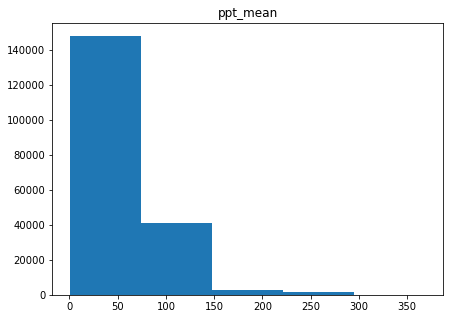

In [24]:
plt.figure(figsize = (7,5))
plt.hist(merged_data['ppt_mean'], bins=5)
plt.title('ppt_mean', fontsize = 12)
plt.show()

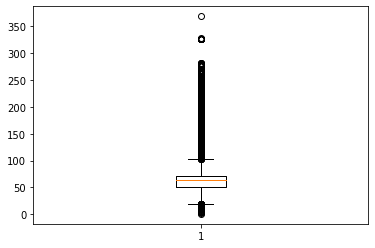

In [25]:
plt.boxplot(merged_data['ppt_mean'])
plt.show()

In [26]:
merged_data['ppt_mean'].describe()

count    193791.000000
mean         67.600134
std          28.777483
min           0.766667
25%          51.116665
50%          64.600000
75%          72.133330
max         368.750000
Name: ppt_mean, dtype: float64

#### soil_mean

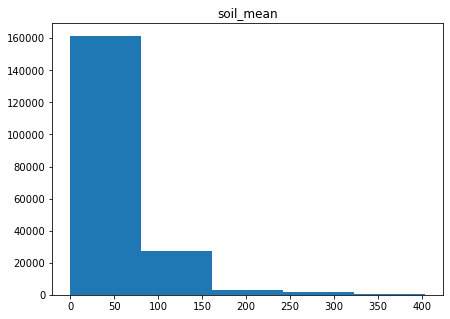

In [27]:
plt.figure(figsize = (7,5))
plt.hist(merged_data['soil_mean'], bins=5)
plt.title('soil_mean', fontsize = 12)
plt.show()

In [28]:
merged_data['soil_mean'].describe()

count    193791.000000
mean         54.185999
std          45.704649
min           0.000000
25%          26.066668
50%          47.416668
75%          63.100000
max         403.716670
Name: soil_mean, dtype: float64

#### tmax_mean

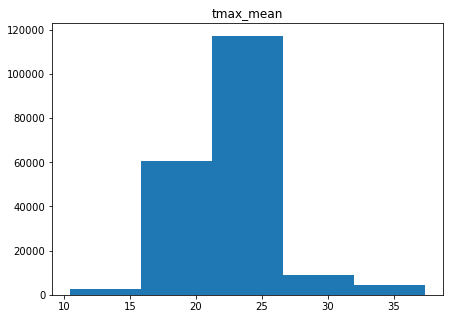

In [29]:
plt.figure(figsize = (7,5))
plt.hist(merged_data['tmax_mean'], bins=5)
plt.title('tmax_mean', fontsize = 12)
plt.show()

In [30]:
merged_data['tmax_mean'].describe()

count    193791.000000
mean         22.698504
std           3.174983
min          10.465001
25%          20.701666
50%          22.698504
75%          24.218334
max          37.401672
Name: tmax_mean, dtype: float64

#### tmin_mean

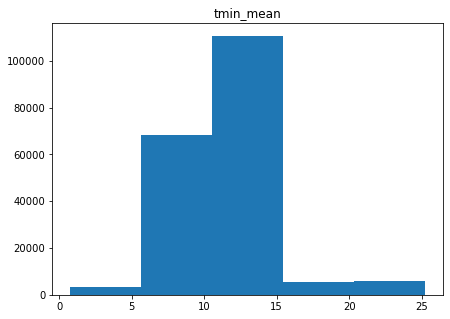

In [31]:
plt.figure(figsize = (7,5))
plt.hist(merged_data['tmin_mean'], bins=5)
plt.title('tmin_mean', fontsize = 12)
plt.show()


In [32]:
merged_data['tmin_mean'].describe()

count    193791.000000
mean         11.160806
std           3.157901
min           0.758334
25%           9.066668
50%          11.160806
75%          12.721667
max          25.253334
Name: tmin_mean, dtype: float64

### Multivariate Analysis

#### Pie Chart

In [33]:
Australia_data = merged_data1[merged_data1['continent'] == 'Australia']
Central_America_data = merged_data1[merged_data1['continent'] == 'Central_America']
Africa_data = merged_data1[merged_data1['continent'] == 'Africa']
Unknown_or_invalid_data = merged_data1[merged_data1['continent'] == 'Unknown_or_invalid']

Text(0.5, 1.0, 'Australia')

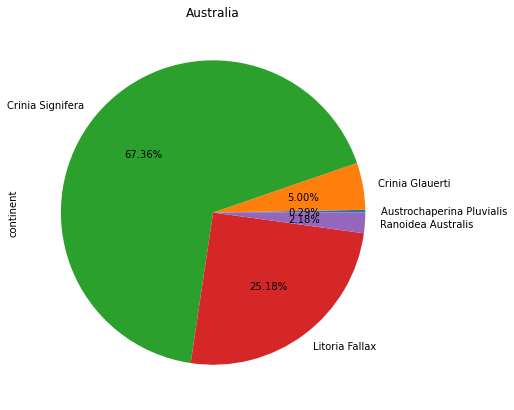

In [34]:
Australia_data.groupby('species')['continent'].count().plot(kind = 'pie', autopct = '%1.2f%%', figsize = (7,7), fontsize = 10)
plt.title('Australia')

Crinia Signifera is the most dominant specie in Australia as compared to the others but Austrochaperina Pluvialis is the less dominant specie.

Text(0.5, 1.0, 'Africa')

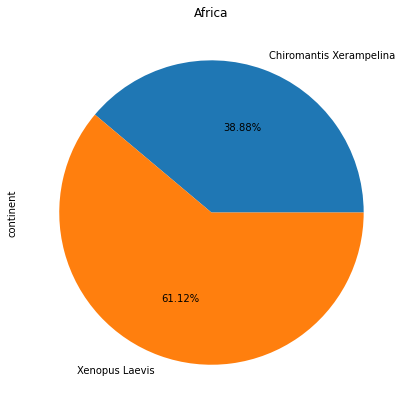

In [35]:
Africa_data.groupby('species')['continent'].count().plot(kind = 'pie', autopct = '%1.2f%%', figsize = (7,7), fontsize = 10)
plt.title('Africa')

Africa has only two dominant speices. Xenopus being the highest and Chiromantis Xerampelina being the least.

C:\Users\HOPE\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1616: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


Text(0.5, 1.0, 'Central_America')

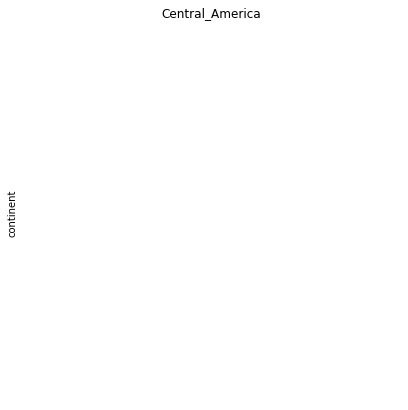

In [36]:
Central_America_data.groupby('species')['continent'].count().plot(kind = 'pie', autopct = '%1.2f%%', figsize = (7,7), fontsize = 10)
plt.title('Central_America')

I dont know why this is not showing

Text(0.5, 1.0, 'Unknown_or_invalid')

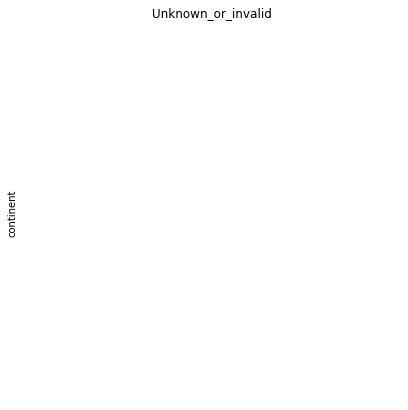

In [37]:
Unknown_or_invalid_data.groupby('species')['continent'].count().plot(kind = 'pie', autopct = '%1.2f%%', figsize = (7,7), fontsize = 10)
plt.title('Unknown_or_invalid')

I dont know why this is also not showing

In [38]:
#Checking the continents and their respective ppt_mean
merged_data.groupby('continent')['ppt_mean'].sum()

continent
Africa                8.004080e+04
Australia             1.229640e+07
Central America       7.207308e+05
unknown or invalid    3.124950e+03
Name: ppt_mean, dtype: float64

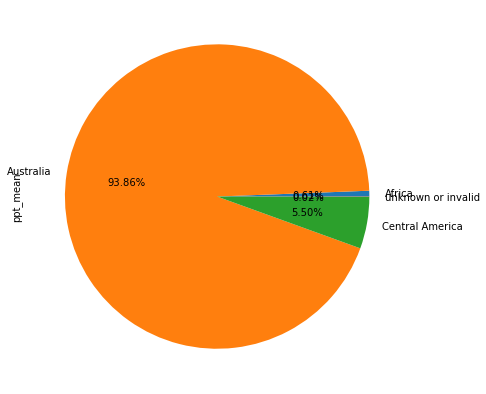

In [39]:
merged_data.groupby('continent')['ppt_mean'].sum().plot(kind = 'pie', figsize = (7,7), fontsize = 10, autopct = '%1.2f%%')
plt.show()

Australia had the highest ppt_mean followed by the rest with Unknown or Invalid having the least

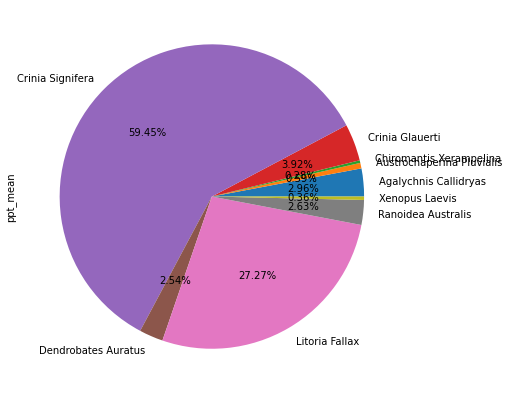

In [40]:
merged_data.groupby('species')['ppt_mean'].sum().plot(kind = 'pie', figsize = (7,7), fontsize = 10, autopct = '%1.2f%%')
plt.show()

Crinia Signifera had the highest ppt_mean followed by the rest and Chiromantis Xerampelina having the least

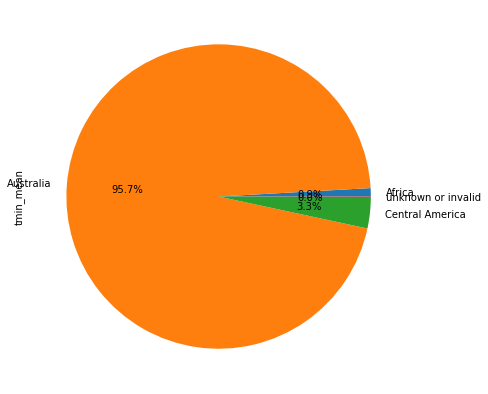

In [41]:
merged_data1.groupby(['continent'])['tmin_mean'].sum().plot(kind='pie', fontsize=10,figsize=(7,7), autopct= '%1.1f%%')
plt.show()

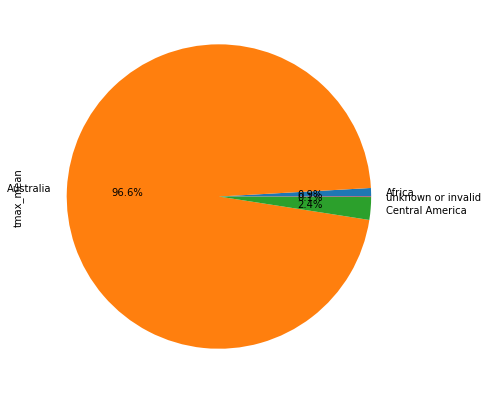

In [42]:
merged_data1.groupby(['continent'])['tmax_mean'].sum().plot(kind='pie', fontsize=10,figsize=(7,7), autopct= '%1.1f%%')
plt.show()

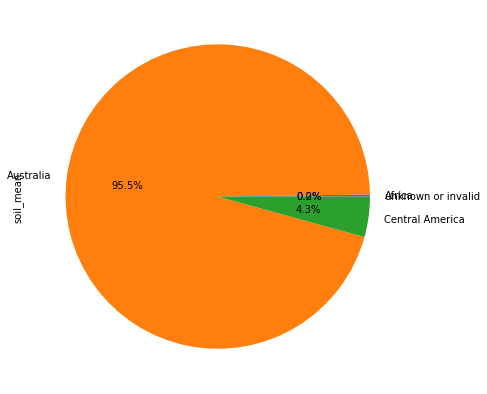

In [43]:
merged_data1.groupby(['continent'])['soil_mean'].sum().plot(kind='pie', fontsize=10,figsize=(7,7), autopct= '%1.1f%%')
plt.show()

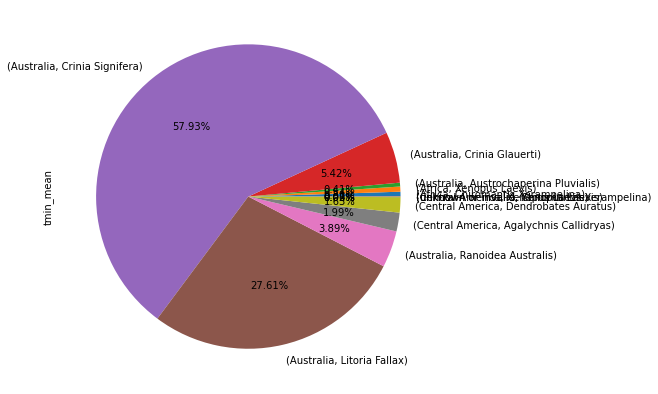

In [44]:
merged_data.groupby(['continent','species'])['tmin_mean'].sum().plot(kind = 'pie', figsize = (7,7), fontsize = 10, autopct = '%1.2f%%')
plt.show()

In [45]:
#checking the continent and species that experience minimum temperature
merged_data.groupby(['continent','species'])['tmin_mean',].max()

tmin_mean
continent          species                             
Africa             Chiromantis Xerampelina    20.705004
                   Xenopus Laevis             17.950003
Australia          Austrochaperina Pluvialis  20.905000
                   Crinia Glauerti            18.586668
                   Crinia Signifera           21.785002
                   Litoria Fallax             21.785002
                   Ranoidea Australis         25.253334
Central America    Agalychnis Callidryas      24.465000
                   Dendrobates Auratus        24.465000
                   Xenopus Laevis              6.651668
unknown or invalid Chiromantis Xerampelina    17.025002
                   Xenopus Laevis             19.120000

In [46]:
#checking the continent and species that experience maximum temperature
merged_data.groupby(['continent','species'])['tmax_mean',].max()

tmax_mean
continent          species                             
Africa             Chiromantis Xerampelina    33.560000
                   Xenopus Laevis             32.871666
Australia          Austrochaperina Pluvialis  30.146666
                   Crinia Glauerti            27.993336
                   Crinia Signifera           33.481670
                   Litoria Fallax             31.393333
                   Ranoidea Australis         37.401672
Central America    Agalychnis Callidryas      35.678333
                   Dendrobates Auratus        33.603333
                   Xenopus Laevis             23.161669
unknown or invalid Chiromantis Xerampelina    32.938335
                   Xenopus Laevis             31.790003

#### Bar Chart

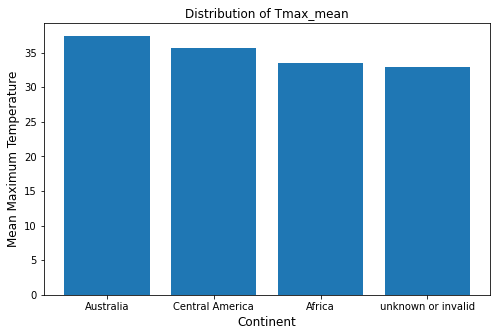

In [47]:
plt.figure(figsize = (8,5))
plt.bar(merged_data1['continent'], merged_data1['tmax_mean'])
plt.title('Distribution of Tmax_mean', fontsize = 12)
plt.xlabel('Continent', fontsize = 12)
plt.ylabel('Mean Maximum Temperature', fontsize = 12)
plt.show()

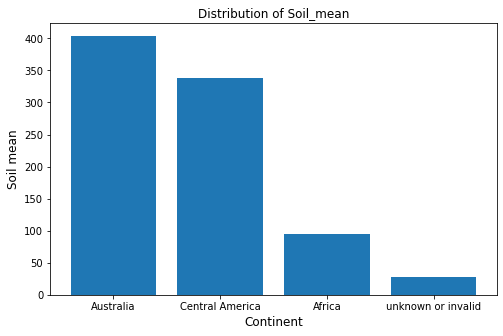

In [48]:
plt.figure(figsize = (8,5))
plt.bar(merged_data1['continent'], merged_data1['soil_mean'])
plt.title('Distribution of Soil_mean', fontsize = 12)
plt.xlabel('Continent', fontsize = 12)
plt.ylabel('Soil mean', fontsize = 12)
plt.show()

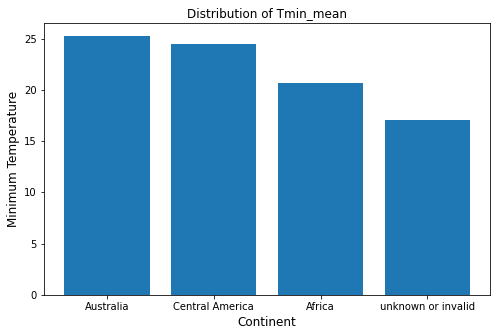

In [49]:
plt.figure(figsize = (8,5))
plt.bar(merged_data1['continent'], merged_data1['tmin_mean'])
plt.title('Distribution of Tmin_mean', fontsize = 12)
plt.xlabel('Continent', fontsize = 12)
plt.ylabel('Minimum Temperature', fontsize = 12)
plt.show()